# Test Loader for the Data

In [1]:
!pip install librosa

     -------------------------------------- 214.3/214.3 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 3.1/3.1 MB 7.8 MB/s eta 0:00:00
     ------------------------------------- 377.0/377.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 298.0/298.0 kB 18.0 MB/s eta 0:00:00
     ---------------------------------------- 7.3/7.3 MB 16.8 MB/s eta 0:00:00
     ---------------------------------------- 56.3/56.3 kB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 15.7 MB/s eta 0:00:00
     --------------------------------------- 39.8/39.8 MB 17.7 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 18.2 MB/s eta 0:00:00
     ------------------------------------- 952.8/952.8 kB 15.0 MB/s eta 0:00:00
  Created wheel for audioread: 

In [12]:
import numpy as np
import librosa
import torch
import torchaudio
from torchvision import datasets
import matplotlib.pyplot as plt

In [3]:
def audio_file_to_numpy(file_name, segment_length=None, sample_rate=22050):
  """
    Loads an audio file
    :file_name The audio file that should be loaded
    :segment_length The length of the segment that should be loaded (important for the actual competition stats)
    :sample_rate The sampling rate of the audio file, set to the default rate by librosa unless you want to set it

    returns a numpy array of the audio
  """
  # Store the sampling rate as sr
  waveform, sr = librosa.load(file_name, sr=sample_rate, mono=True)

  if segment_length is None:
    return waveform

  segment_wave = waveform[:segment_length*sample_rate]

  if len(segment_wave) < segment_length * sample_rate:
    segment_wave = np.pad(segment_wave, (segment_length * sample_rate - len(segment_wave), 0))
  
  return segment_wave


In [6]:
loaded_audio = audio_file_to_numpy('data/afrsil1/XC125458.ogg')
loaded_audio

array([ 5.0492542e-07, -7.3427293e-07, -2.2115759e-05, ...,
       -1.7683487e-04, -7.3902743e-06,  0.0000000e+00], dtype=float32)

## Load audio with pytorch instead

This is the shape of the waveform: torch.Size([1, 1504653])
This is the output for Sample rate of the waveform: 32000


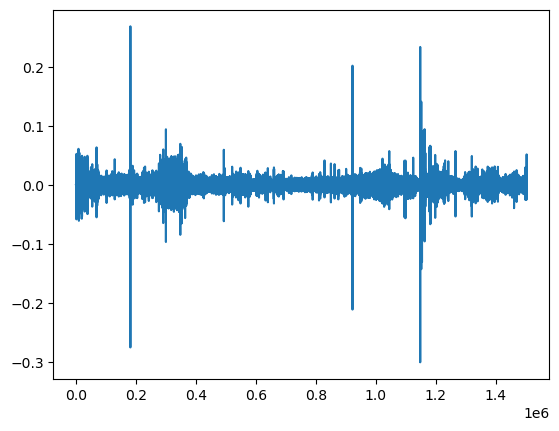

In [11]:
data_dir = "data/"

waveform, sr = torchaudio.load('data/afrsil1/XC175522.ogg')
print("This is the shape of the waveform: {}".format(waveform.size()))
print("This is the output for Sample rate of the waveform: {}".format(sr))

plt.figure()
plt.plot(waveform.t().numpy())





FileNotFoundError: Found no valid file for the classes afrsil1, akekee, akepa1, akiapo, akikik, amewig, aniani, apapan, arcter, barpet, bcnher, belkin1, bkbplo, bknsti, bkwpet, blkfra, blknod, bongul, brant, brnboo, brnnod, brnowl, brtcur, bubsan, buffle, bulpet, burpar, buwtea, cacgoo1, calqua, cangoo, canvas, caster1, categr, chbsan, chemun, chukar, cintea, comgal1, commyn, compea, comsan, comwax, coopet, crehon, dunlin, elepai, ercfra, eurwig, fragul, gadwal, gamqua, glwgul, gnwtea, golphe, grbher3, grefri, gresca, gryfra, gwfgoo, hawama, hawcoo, hawcre, hawgoo, hawhaw, hawpet1, hoomer, houfin, houspa, hudgod, iiwi, incter1, jabwar, japqua, kalphe, kauama, laugul, layalb, lcspet, leasan, leater1, lessca, lesyel, lobdow, lotjae, madpet, magpet1, mallar3, masboo, mauala, maupar, merlin, mitpar, moudov, norcar, norhar2, normoc, norpin, norsho, nutman, oahama, omao, osprey, pagplo, palila, parjae, pecsan, peflov, perfal, pibgre, pomjae, puaioh, reccar, redava, redjun, redpha1, refboo, rempar, rettro, ribgul, rinduc, rinphe, rocpig, rorpar, rudtur, ruff, saffin, sander, semplo, sheowl, shtsan, skylar, snogoo, sooshe, sooter1, sopsku1, sora, spodov, sposan, towsol, wantat1, warwhe1, wesmea, wessan, wetshe, whfibi, whiter, whttro, wiltur, yebcar, yefcan, zebdov. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp